# <center> Scientific Programming in Python

## <center>SciPro_ID: 2024SS_04462<br>Bonn-Rhein-Sieg University of Applied Sciences<br>Sankt Augustin, Germany

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## <u>Inserting and cleaning data

In [2]:
books_df = pd.read_csv("bestsellers_by_categories.csv")

books_df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


Check for missing data from printing the sum.

In [3]:
print(books_df.isnull().sum())

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


Skimming the dataset we can see that the two authors George R. R. Martin and J. K. Rowling appear twice as their own Author. So we need to combine their datapoints so we only get one unified author name.

In [4]:
books_df = books_df.replace('George R. R. Martin', 'George R.R. Martin')
books_df = books_df.replace('J. K. Rowling', 'J.K. Rowling')

I will also drop the year column for the analysis now and remove the resulting duplicates. There are books in the dataset that are appearing more than once because they were sold in multiple years. Later we will pick the data back up for further exploration of the data.

In [5]:
abs_books_df = books_df.drop(columns=["Year"])
abs_books_df.drop_duplicates(inplace=True)


## <u>Analyzing the Genre

Visualizing how many books are from the Fiction genre and how many are Non Fiction (relative and absolute).

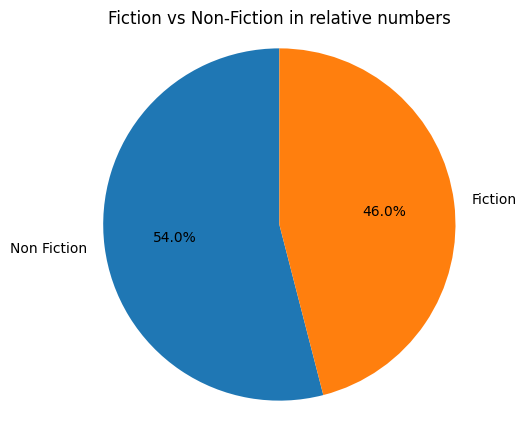

In [10]:
genre_counts = abs_books_df["Genre"].value_counts()

labels = genre_counts.index
sizes = genre_counts.values

#Pie Chart for relative view
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.axis("equal")  

plt.title("Fiction vs Non-Fiction in relative numbers")
plt.show()

Text(0.5, 1.0, 'Fiction vs Non-Fiction in absolute numbers')

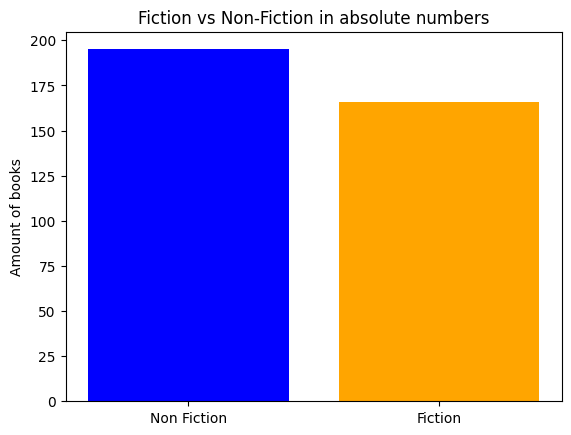

In [12]:
#Histogramm for absolute view
plt.bar(labels, sizes, color=["blue","orange"])
plt.ylabel("Amount of books")
plt.title("Fiction vs Non-Fiction in absolute numbers")

## <u>Most "successful" author

Here I want to analyze the author with the most books written which got into to the Amazon Top 50 Bestselling Books List.

In [24]:
authors = abs_books_df.groupby("Author")["Author"].aggregate("count")

authors.sort_values(ascending=False)

Author
Jeff Kinney         12
Rick Riordan        10
J.K. Rowling         8
Stephenie Meyer      7
Dav Pilkey           6
                    ..
Jaycee Dugard        1
Brian Kilmeade       1
Jen Sincero          1
Jennifer Smith       1
Abraham Verghese     1
Name: Author, Length: 246, dtype: int64

Since there are a lot of authors who have only gotten one book in the Bestseller List we will only plot the 20 best performing ones.

<BarContainer object of 20 artists>

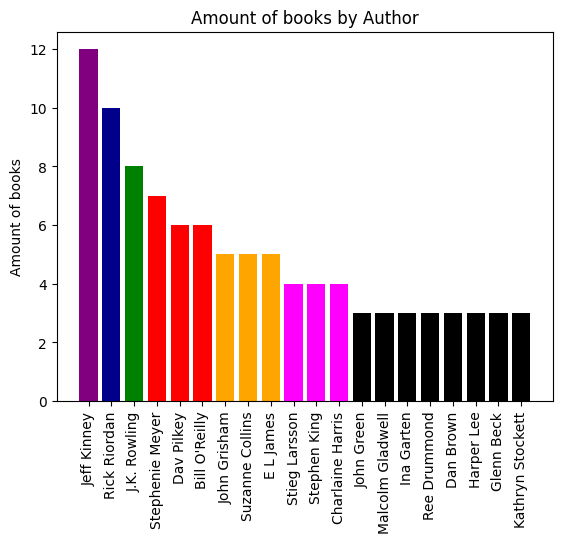

In [37]:
top20 = authors.sort_values(ascending=False).head(20)

size = top20.index 
labels = top20.values

plt.title("Amount of books by Author")
plt.ylabel("Amount of books")
plt.xticks(rotation=90)
plt.bar(size,labels, 
        color=["purple","darkblue","green","red","red","red",
               "orange","orange","orange","magenta","magenta","magenta",
               "black","black","black","black","black","black","black","black"])

## <u>Correlation of Price and Review

From here on we are going to use the original dataset (books_df) with all the years included. Now I want to analyze if the price of a book played a role in the books review. 
There is one issue that I wouldn't know how to resolve so the data is a bit wrong. There are some datapoints where the price is 0 and I honestly don't know what that is supposed to mean in this context.

First I want to calculate the mean, mode and median of the price of the books as well as the max and the min price.

In [62]:
price_mean = np.mean(books_df["Price"]) 
price_median = np.median(books_df["Price"])
price_mode = books_df["Price"].mode().iloc[0]
price_max = np.max(books_df["Price"])
price_min = np.min(books_df["Price"])

print(f"Mean price: {price_mean} \nMode price: {price_mode}\nMedian price: {price_median}\nMax price: {price_max}\nMin price: {price_min}")

Mean price: 13.1 
Mode price: 8
Median price: 11.0
Max price: 105
Min price: 0


In [44]:
books_df.corr(method="pearson", numeric_only=True)["Reviews"]

User Rating   -0.001729
Reviews        1.000000
Price         -0.109182
Year           0.263560
Name: Reviews, dtype: float64

Looking at the columns of the reviews we can see that with a higher rating the price sinks accordingly. Let's see by looking at the the best and worst books by rating.

In [49]:
top10_books = books_df.nlargest(10, "User Rating")
worst10_books = books_df.nsmallest(10, "User Rating")

top10_books, worst10_books

(                                                  Name                Author  \
 40            Brown Bear, Brown Bear, What Do You See?       Bill Martin Jr.   
 41            Brown Bear, Brown Bear, What Do You See?       Bill Martin Jr.   
 81   Dog Man and Cat Kid: From the Creator of Capta...            Dav Pilkey   
 82   Dog Man: A Tale of Two Kitties: From the Creat...            Dav Pilkey   
 83   Dog Man: Brawl of the Wild: From the Creator o...            Dav Pilkey   
 84   Dog Man: Brawl of the Wild: From the Creator o...            Dav Pilkey   
 85   Dog Man: Fetch-22: From the Creator of Captain...            Dav Pilkey   
 86   Dog Man: For Whom the Ball Rolls: From the Cre...            Dav Pilkey   
 87   Dog Man: Lord of the Fleas: From the Creator o...            Dav Pilkey   
 146  Goodnight, Goodnight Construction Site (Hardco...  Sherri Duskey Rinker   
 
      User Rating  Reviews  Price  Year    Genre  
 40           4.9    14344      5  2017  Fiction  
 41  

In [54]:
top10_price = top10_books["Price"].mean()
worst10_price = worst10_books["Price"].mean()

top10_price, worst10_price

(6.1, 14.1)

On average you can say that with a lower price the rating of the book is getting higher. My assumption is that people get influenced by the buying price of the book to some extent. This is also seen if you compare the prices of the lower rated books and the higher rated ones. The price of lower rated books is more often in the double digit area while the higher rated ones are closer to the mode of all prices or lower.

## <u>Reference 

Sooter Saalu. (2020). Amazon Top 50 Bestselling Books 2009 - 2019 [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/1556647